## Scikit-Learn Demo

* scikit learn is another data analysis library that helps us fit our models, preprocess data, as well as choose and evaluate models

* This demo will specifically focus on regression modeling. This is very important when making predictions based on weights

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Creating Bindary DF and Cleaning/Preprocessing Data

In [2]:
df = pd.read_csv("Michigan_GameLogs_W24.csv")
df.head()

,id,date,year,opponent,home_away,result,points_scored,points_against,pass_cmp,pass_att,...,pass_yrds,pass_td,pass_1st_down,rush_att,rush_yrds,rush_td,rush_1st_down,total_offense,fumbles,ints
0,1,2011-09-03,2011,Western Michigan,Home,W,34,10,9,13,...,98,0,5,26,190,3,9,288,0,0
1,2,2011-09-10,2011,Notre Dame,Home,W,35,31,11,24,...,338,4,10,26,114,1,5,452,0,3
2,3,2011-09-17,2011,Eastern Michigan,Home,W,31,3,7,18,...,95,2,5,50,376,2,19,471,0,1
3,4,2011-09-24,2011,San Diego State,Home,W,28,7,8,17,...,93,0,3,45,320,4,14,413,2,2
4,5,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,...,217,3,10,48,363,3,19,580,0,0


In [3]:
# linear regression analyzes the realtionship of two variables (x and y). This binary df extracts only our x and y data
df_binary = df[['total_offense', 'points_scored']]
df_binary

,total_offense,points_scored
0,288,34
1,452,35
2,471,31
3,413,28
4,580,58
...,...,...
160,291,31
161,338,30
162,213,26
163,351,27


In [4]:
#clean and preprocess data
df_binary.isnull().sum()

total_offense    0
points_scored    0
dtype: int64

In [5]:
#get rid of any duplicate rows ... we don't have any which means we did a good job while scraping
df_binary = df_binary.dropna()
df_binary

,total_offense,points_scored
0,288,34
1,452,35
2,471,31
3,413,28
4,580,58
...,...,...
160,291,31
161,338,30
162,213,26
163,351,27


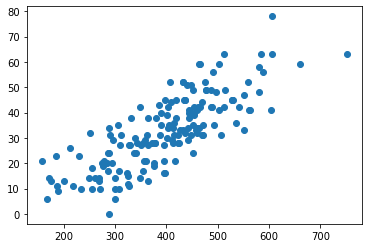

In [6]:
plt.scatter(df_binary['total_offense'], df_binary['points_scored'])
plt.show()

### Separate Data into Training and Testing Data

In [7]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# we can do that because each dataframe contains only one column

X = np.array(df_binary['total_offense']).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
Y = np.array(df_binary['points_scored']).reshape(-1,1)
print('X:', X[:5]) #printing first 5 values of X and Y
print('Y:', Y[:5])

X: [[288]
 [452]
 [471]
 [413]
 [580]]
Y: [[34]
 [35]
 [31]
 [28]
 [58]]


In [8]:
# This train_test_split function splits your data randomly (unbiased) into training and testing data
# This is important bc a model needs data to "learn" (training data) and data to compare its predictions with (testing)
# to see how well it has actually learned.
# This example uses a test size of 20%, following the 80/20 train/test split rule (always have more training than testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Running Linear Regression and Plotting on Scatterplot

In [9]:
# LinearRegression() actually creates our model
regr = LinearRegression()

# and "fit" the training data into the linear regression model
regr.fit(X_train, Y_train)

LinearRegression()

In [10]:
#.score() shows how accurate our linear regression() test was when running through our testing data
regr.score(X_test, Y_test)

# we can see that our regression model ran at an accuracy of 71.8%. 
# This is a decent score but could probably be improved upon

0.6123011281950157

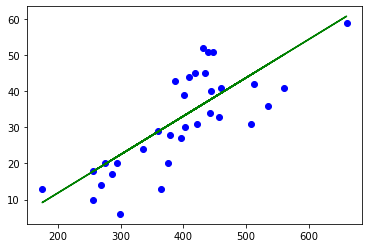

In [11]:
#lets first plot our predicted values in a scatter plot
y_pred = regr.predict(X_test) # y_hat = ax + b
plt.scatter(X_test, Y_test, color = 'b')
plt.plot(X_test, y_pred, color = 'g')
plt.show()

#In this plot, we can see that the green line is our prediction (in the form y = ax + b)

In [12]:
# Use the following functions to get the a and b in the y = ax + b formula
print(regr.intercept_)
print(regr.coef_)
# y = 0.101x - 7.635

[-9.51761904]
[[0.10665155]]


## Running Polynomial Regression and Plotting on Scatterplot

In [13]:
#we will now have to change our X training data to fit a quadratic regression
poly_reg = PolynomialFeatures(degree = 2) # polynomial degrees; 2 means it is quadratic, 1 means linear

# next we're going to use the .fit_transform() to scale the data and its parameters
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [14]:
#Now we can crate our polynomial regression model similar to before

poly_regr = LinearRegression()
poly_regr.fit(X_train_poly, Y_train)

LinearRegression()

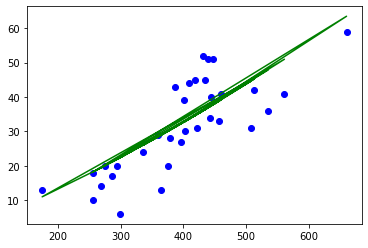

In [15]:
plt.clf()
y_pred_poly = poly_regr.predict(X_test_poly)
plt.scatter(X_test, Y_test, color = 'b')
plt.plot(X_test, y_pred_poly, color = 'g')
plt.show()

In [16]:
#we can use some of the same functions as before to fill in the a b and c values within y = ax^2 + bx + c function
#as well as get our accuracy score
print(poly_regr.score(X_test_poly, Y_test)) #model ran at accuracy of 70.8%
print(poly_regr.intercept_)
print(poly_regr.coef_) # y = ax^2 + bx + c

#y = -0.0000017x^2 + 0.1024x - 7.8939

0.5999815004453698
[-2.57698253]
[[0.00000000e+00 6.92470194e-02 4.66893804e-05]]


Polynomial Model Takeaways
* Our polynomial regression model is slightly less accurate than the linear, but not by much.
* This may be different if there were more data.
* For example, things could be different if we included more seasons worth of data or included all FBS teams instead of just Michigan.

## Computing 3 Types of Errors

Mean Absolute Error (MAE)
* Measures the average magnitude of the errors in a set of predictions, without considring their direction

Mean Squared Error (MSE)
* Measures the average squared error between the predicted and actual values

Root Mean Squared Error (RMSE)
* Measures the square root of MSE
* Typically the most favorite error metric to look at

In [17]:
# Linear Regression Model Error
# for mse and rmse, squared = True (default) indicates MSE and squared = False indicates RMSE

mae = mean_absolute_error(y_true = Y_test, y_pred = y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_true = Y_test, y_pred = y_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_true = Y_test, y_pred = y_pred, squared = False)
print("RMSE:", rmse)

MAE: 6.830363854222438
MSE: 70.80257192753723
RMSE: 8.414426417025538


In [18]:
# Polynomial Regression Model Error

mae_poly = mean_absolute_error(y_true = Y_test, y_pred = y_pred_poly)
print("MAE:", mae_poly)
mse_poly = mean_squared_error(y_true = Y_test, y_pred = y_pred_poly)
print("MSE:", mse_poly)
rmse_poly = mean_squared_error(y_true = Y_test, y_pred = y_pred_poly, squared = False)
print("RMSE:", rmse_poly)

MAE: 6.92780733551945
MSE: 73.05241424924392
RMSE: 8.54707050686046


Takeaway: the RMSE of both models is similar (around 8.2) meaning our models were not optimized and didn't badly fit the data given

Overfitting is when the model does not make accurate predictions on data bc if the model gets trained on so much data, it learns to model only after that type of data and its noise and inaccuracies leading to high variance when inputted with testing data.

Overfitting can be reduced by increasing training data, reducing model complexity, early stopping during the training phase, and Ridge Regularization and Lasso Regularization.